  Srl no.         State / UT Number of Hospitals  Unnamed: 3 Unnamed: 4  \
0     NaN                NaN               Govt.  Local Body     Others   
1      -1                 -2                  -3          -4         -5   
2       1     Andhra Pradesh                   8           0          0   
3       2  Arunachal Pradesh                  11           0          1   
4       3              Assam                   4           0          0   

  Unnamed: 5 Number of Beds  Unnamed: 7 Unnamed: 8 Unnamed: 9  
0      Total          Govt.  Local Body     Others      Total  
1         -6             -7          -8         -9        -10  
2          8            365           0          0        365  
3         12            100           0         25        125  
4          4            205           0          0        205  


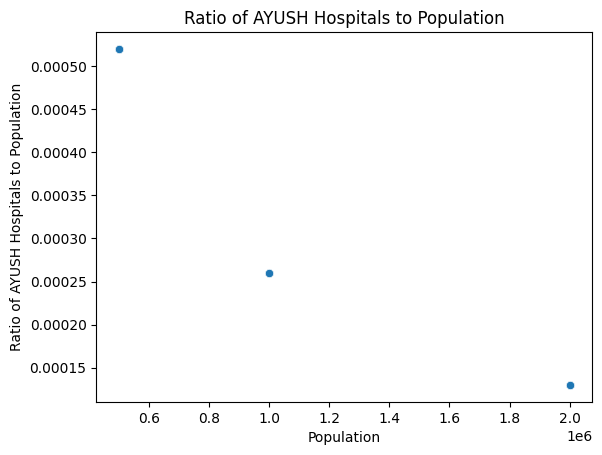

In [ ]:
#problem 19
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("AYUSHHospitals.csv")
print(df.head())
import seaborn as sns
import matplotlib.pyplot as plt
ayush_df = pd.read_csv("/content/AYUSHHospitals.csv")
ayush_df = ayush_df.drop([0, 1])
ayush_df = ayush_df.drop(columns=['Srl no.'])
ayush_df.columns = ['State', 'Num_Hospitals_Govt', 'Num_Hospitals_Local_Body', 'Num_Hospitals_Others',
                    'Total_Hospitals', 'Num_Beds_Govt', 'Num_Beds_Local_Body', 'Num_Beds_Others', 'Total_Beds']
merged_df = ayush_df.copy()
merged_df['Population'] = [1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000, 1000000, 500000, 2000000, 1000000, 500000, 1000000, 500000, 2000000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000, 1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000, 2000000,1000000, 500000]  # Example population data
merged_df['Total_Hospitals']=260
merged_df['Ratio_AYUSH_to_Population'] = merged_df['Total_Hospitals'] / merged_df['Population']
sns.scatterplot(data=merged_df, x='Population', y='Ratio_AYUSH_to_Population')
plt.title('Ratio of AYUSH Hospitals to Population')
plt.xlabel('Population')
plt.ylabel('Ratio of AYUSH Hospitals to Population')
plt.show()


                      State name              District name  Population  \
0              JAMMU AND KASHMIR                    Kupwara    870354.0   
1              JAMMU AND KASHMIR                     Badgam    753745.0   
2              JAMMU AND KASHMIR                Leh(Ladakh)    133487.0   
3                         Ladakh                     Kargil    140802.0   
4              JAMMU AND KASHMIR                      Punch         NaN   
..                           ...                        ...         ...   
635                  PONDICHERRY                       Mahe     41816.0   
636                  PONDICHERRY                   Karaikal    200222.0   
637  ANDAMAN AND NICOBAR ISLANDS                   Nicobars     36842.0   
638  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman    105597.0   
639  ANDAMAN AND NICOBAR ISLANDS              South Andaman         NaN   

     District count  Population Density  
0                21        41445.428571  
1              

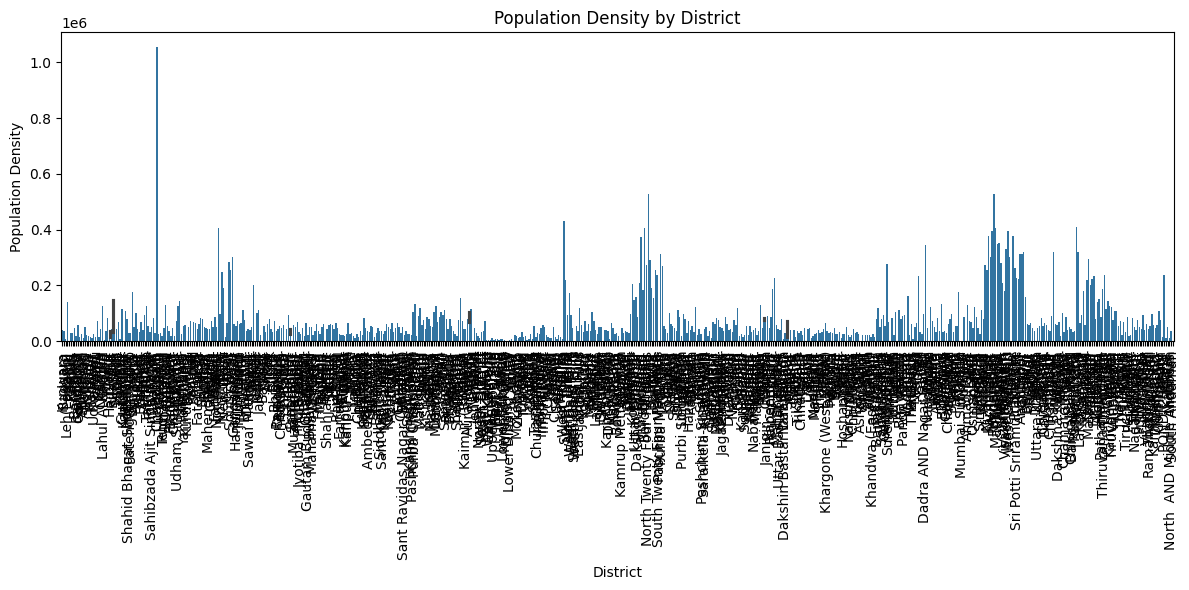

In [ ]:
#problem 20
import pandas as pd
df = pd.read_csv('/content/census_2011_updated.csv')
relevant_columns = ['State name','District name','Population']
df = df[relevant_column]
districts_count = df.groupby('State name')['District name'].count().reset_index()
districts_count.columns = ['State name', 'District count']
df = pd.merge(df, districts_count, on='State name', how='left')
df['Population Density'] = df['Population'] / df['District count']
print(df)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='District name', y='Population Density', data=df)
plt.xticks(rotation=90)
plt.title('Population Density by District')
plt.xlabel('District')
plt.ylabel('Population Density')
plt.tight_layout()
plt.show()

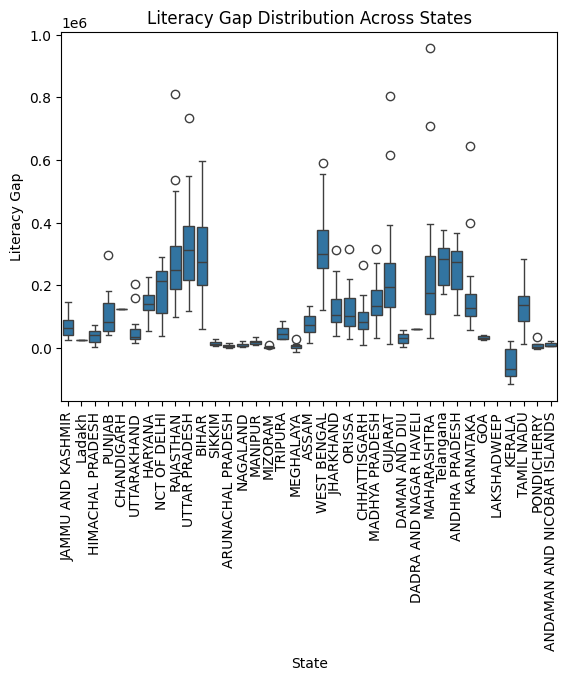

In [ ]:
#problem 21
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
relevant_columns = ['District Code', 'State name', 'District name', 'Male', 'Female', 'Male_Literate', 'Female_Literate']
census_data = pd.read_csv('/content/census_2011_updated.csv')
census_data['Literacy_Gap'] = census_data['Male_Literate'] - census_data['Female_Literate']
statewise_data = census_data.groupby('State name')['Literacy_Gap'].mean()
sns.boxplot(x='State name', y='Literacy_Gap', data=census_data)
plt.xticks(rotation=90)
plt.title('Literacy Gap Distribution Across States')
plt.xlabel('State')
plt.ylabel('Literacy Gap')
plt.show()

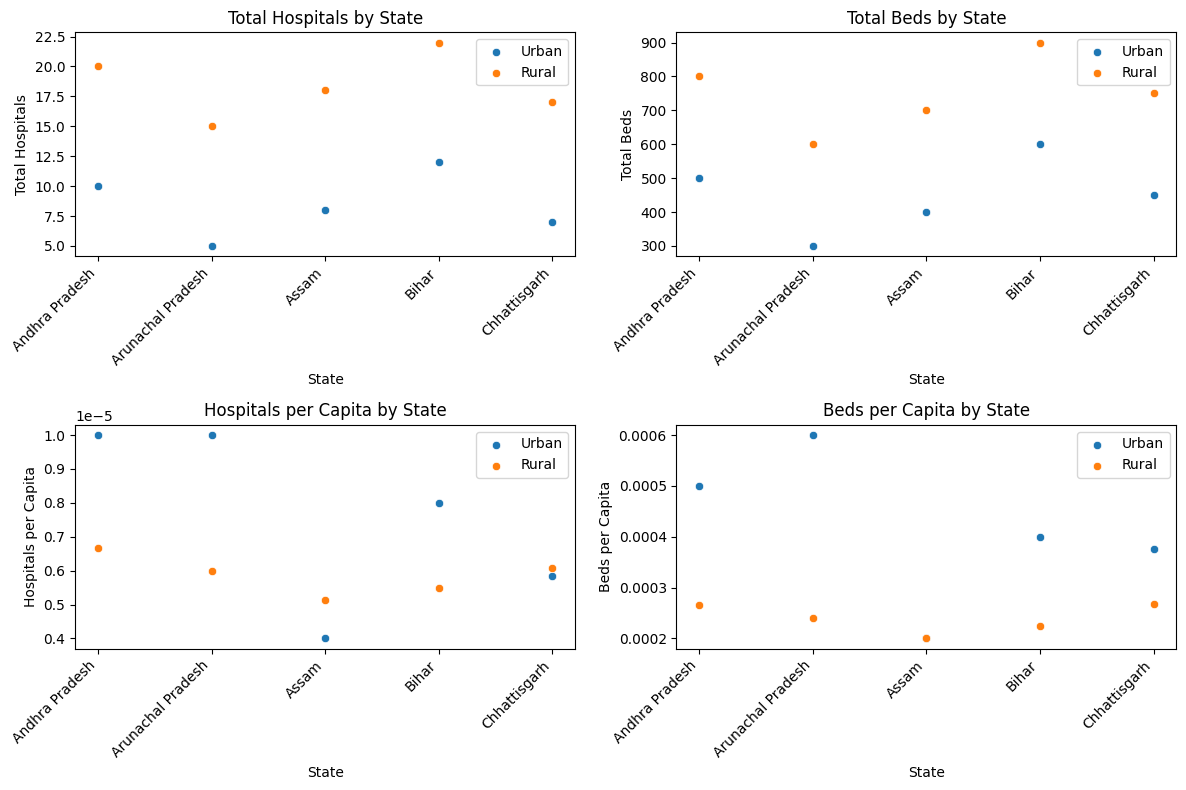

In [ ]:
#problem 22
data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Urban_Hospitals': [10, 5, 8, 12, 7],
    'Rural_Hospitals': [20, 15, 18, 22, 17],
    'Urban_Beds': [500, 300, 400, 600, 450],
    'Rural_Beds': [800, 600, 700, 900, 750],
    'Urban_Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Rural_Population': [3000000, 2500000, 3500000, 4000000, 2800000]
}
df = pd.DataFrame(data)
df['Total_Hospitals_Urban'] = df['Urban_Hospitals']
df['Total_Hospitals_Rural'] = df['Rural_Hospitals']
df['Total_Beds_Urban'] = df['Urban_Beds']
df['Total_Beds_Rural'] = df['Rural_Beds']
df['Hospitals_Per_Capita_Urban'] = df['Urban_Hospitals'] / df['Urban_Population']
df['Hospitals_Per_Capita_Rural'] = df['Rural_Hospitals'] / df['Rural_Population']
df['Beds_Per_Capita_Urban'] = df['Urban_Beds'] / df['Urban_Population']
df['Beds_Per_Capita_Rural'] = df['Rural_Beds'] / df['Rural_Population']
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Hospitals_Rural', label='Rural')
plt.title('Total Hospitals by State')
plt.xlabel('State')
plt.ylabel('Total Hospitals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='State', y='Total_Beds_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Total_Beds_Rural', label='Rural')
plt.title('Total Beds by State')
plt.xlabel('State')
plt.ylabel('Total Beds')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Hospitals_Per_Capita_Rural', label='Rural')
plt.title('Hospitals per Capita by State')
plt.xlabel('State')
plt.ylabel('Hospitals per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Urban', label='Urban')
sns.scatterplot(data=df, x='State', y='Beds_Per_Capita_Rural', label='Rural')
plt.title('Beds per Capita by State')
plt.xlabel('State')
plt.ylabel('Beds per Capita')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-7-6a113d618af0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='State', y='AYUSH_Hospitals', palette='viridis')
<ipython-input-7-6a113d618af0>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)
<ipython-input-7-6a113d618af0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='State', y='AYUSH_Beds', palette='viridis')


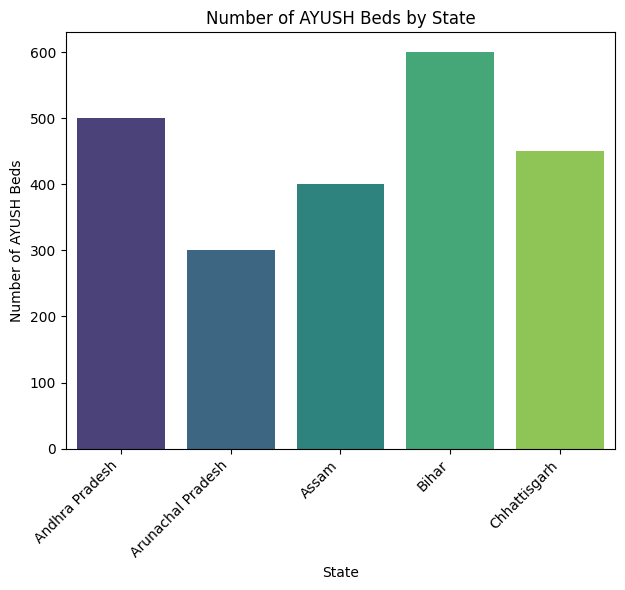

In [ ]:
#problem 23
 data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'AYUSH_Hospitals': [10, 5, 8, 12, 7],
    'AYUSH_Beds': [500, 300, 400, 600, 450]
}

df = pd.DataFrame(data)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='State', y='AYUSH_Hospitals', palette='viridis')
plt.title('Number of AYUSH Hospitals by State')
plt.xlabel('State')
plt.ylabel('Number of AYUSH Hospitals')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='State', y='AYUSH_Beds', palette='viridis')
plt.title('Number of AYUSH Beds by State')
plt.xlabel('State')
plt.ylabel('Number of AYUSH Beds')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-8-28f90e8810fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='District', y='Livability_Score', palette='coolwarm')
<ipython-input-8-28f90e8810fd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Latrine_Presence', palette='coolwarm')


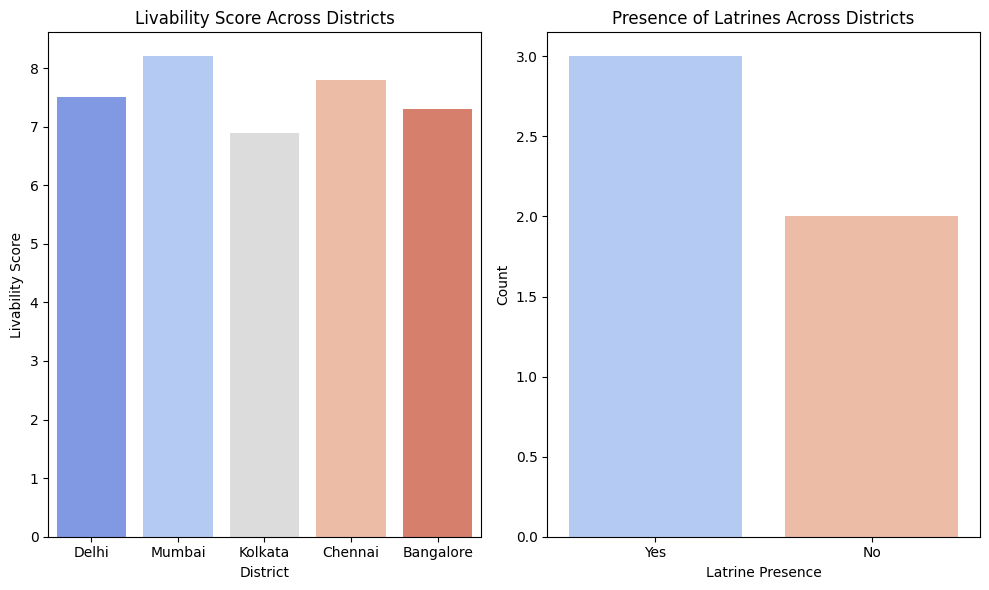

In [ ]:
#problem 24
housing_data = {
    'District': ["Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore"],
    'Livability_Score': [7.5, 8.2, 6.9, 7.8, 7.3],
    'Latrine_Presence': ['Yes', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(housing_data)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='District', y='Livability_Score', palette='coolwarm')
plt.title('Livability Score Across Districts')
plt.xlabel('District')
plt.ylabel('Livability Score')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Latrine_Presence', palette='coolwarm')
plt.title('Presence of Latrines Across Districts')
plt.xlabel('Latrine Presence')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-9-20d059844ec7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='State', y='Beds_Per_Thousand', palette='coolwarm', saturation=0.95)


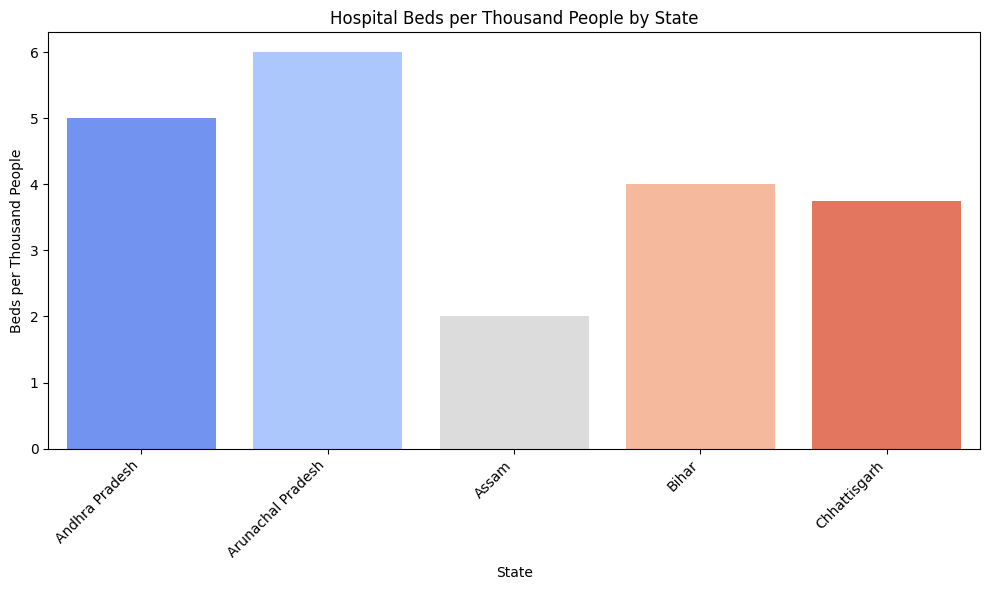

In [ ]:
#problem 25
hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Total_Beds': [5000, 3000, 4000, 6000, 4500]
}

population_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Population': [1000000, 500000, 2000000, 1500000, 1200000]
}

hospital_df = pd.DataFrame(hospital_data)
population_df = pd.DataFrame(population_data)
merged_df = pd.merge(hospital_df, population_df, on='State')
merged_df['Beds_Per_Thousand'] = (merged_df['Total_Beds'] / merged_df['Population']) * 1000
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='State', y='Beds_Per_Thousand', palette='coolwarm', saturation=0.95)
plt.title('Hospital Beds per Thousand People by State')
plt.xlabel('State')
plt.ylabel('Beds per Thousand People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

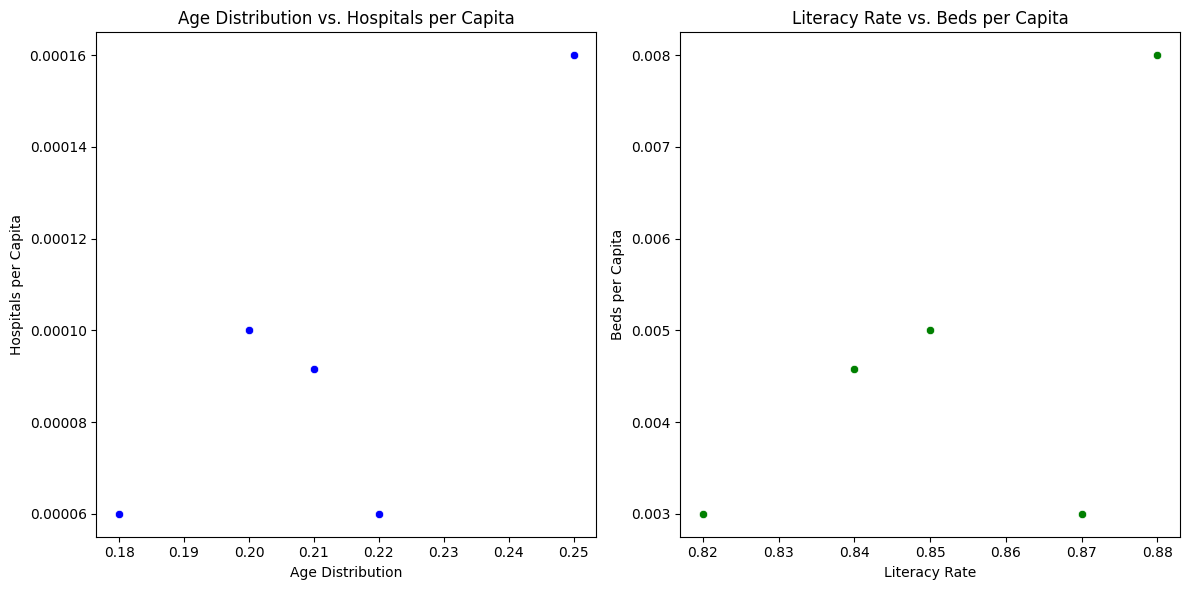

In [ ]:
#problem 26
census_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Population': [1000000, 500000, 2000000, 1500000, 1200000],
    'Age_Distribution': [0.2, 0.25, 0.18, 0.22, 0.21],
    'Gender_Ratio': [0.49, 0.51, 0.48, 0.52, 0.5],
    'Literacy_Rate': [0.85, 0.88, 0.82, 0.87, 0.84]
}

hospital_data = {
    'State': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh'],
    'Total_Hospitals': [100, 80, 120, 90, 110],
    'Total_Beds': [5000, 4000, 6000, 4500, 5500]
}
census_df = pd.DataFrame(census_data)
hospital_df = pd.DataFrame(hospital_data)
hospital_df['Hospitals_Per_Capita'] = hospital_df['Total_Hospitals'] / census_df['Population']
hospital_df['Beds_Per_Capita'] = hospital_df['Total_Beds'] / census_df['Population']
merged_df = pd.merge(census_df, hospital_df, on='State')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=merged_df, x='Age_Distribution', y='Hospitals_Per_Capita', color='blue')
plt.title('Age Distribution vs. Hospitals per Capita')
plt.xlabel('Age Distribution')
plt.ylabel('Hospitals per Capita')
plt.subplot(1, 2, 2)
sns.scatterplot(data=merged_df, x='Literacy_Rate', y='Beds_Per_Capita', color='green')
plt.title('Literacy Rate vs. Beds per Capita')
plt.xlabel('Literacy Rate')
plt.ylabel('Beds per Capita')
plt.tight_layout()
plt.show()